# Car Price Prediction

### Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
sns.set()

### Importing  Data

In [2]:
raw_data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
pd.set_option('display.max_columns',None)
raw_data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### EDA

In [4]:
raw_data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [5]:
raw_data.describe(include = 'all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Data Cleaning

Checking for null values columnize

In [7]:
raw_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Checking for duplicate entries

In [8]:
raw_data.duplicated().sum()

0

### Making copy of our data to ensure data safety

In [9]:
df = raw_data.copy()

In [10]:
df = df.set_index('car_ID')

### Data Transformation

In [11]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,symboling,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
def replace(a,b):
    df["CompanyName"].replace(a,b,inplace=True)

replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyouta','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')

df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

### Data Visualization

<font color = blue> 1) Visualizing the number of cars from different Companies </font>

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


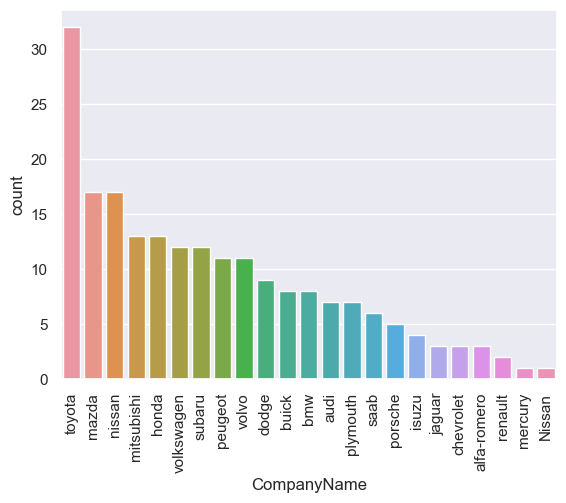

In [13]:
sns.countplot(df['CompanyName'],order = df["CompanyName"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Therefore our data set contains maximum number of cars from toyota

<font color = blue> 2) We check for company wise average car price

In [14]:
CP = df.groupby("CompanyName")["price"].mean()
CP

CompanyName
Nissan          5499.000000
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
nissan         10704.882353
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen     10077.500000
volvo          18063.181818
Name: price, dtype: float64

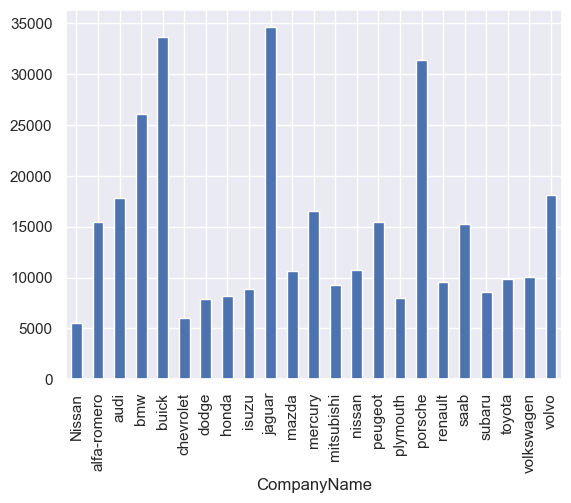

In [15]:
CP.plot(kind="bar")
plt.show()

Therefore: Jaguar has the highest average car price and  Nissan has the lowest average car price

3) Percentage of cars based on different fuelypes

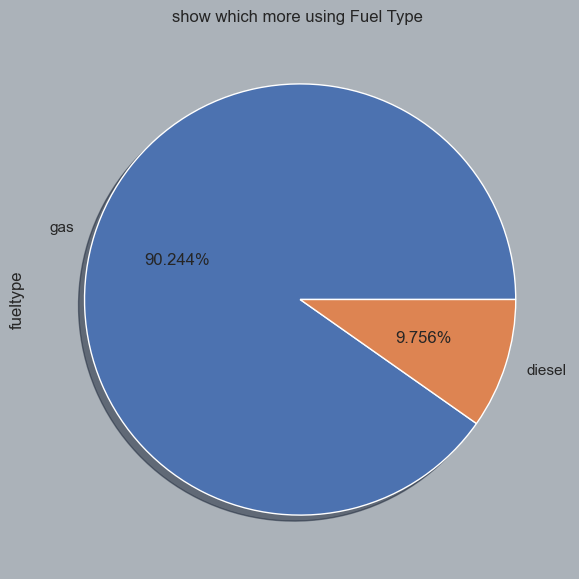

In [16]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ABB2B9")
df["fueltype"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);
plt.title("show which more using Fuel Type ")
plt.show()

In [17]:
FP = df.groupby("fueltype")["price"].mean()
FP

fueltype
diesel    15838.1500
gas       12999.7982
Name: price, dtype: float64

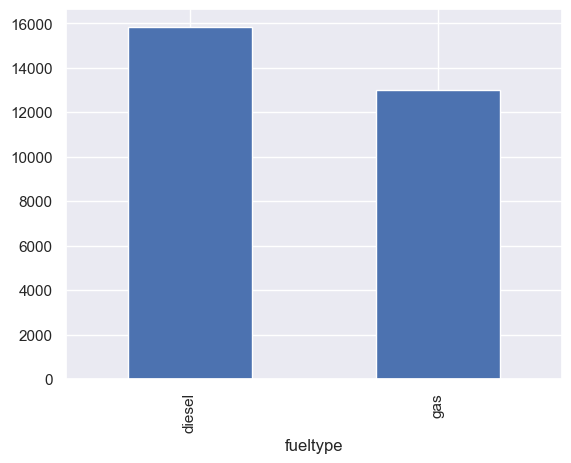

In [18]:
FP.plot(kind="bar")
plt.show()

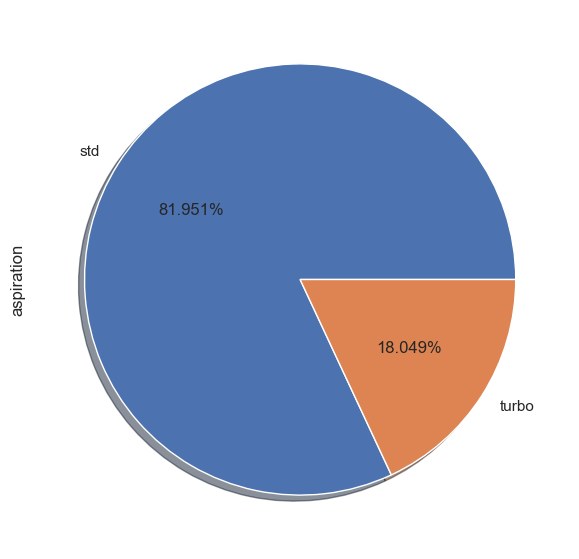

In [19]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ffffff")
df["aspiration"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [20]:
AP = df.groupby("aspiration")["price"].mean()
AP

aspiration
std      12611.270833
turbo    16298.166676
Name: price, dtype: float64

<AxesSubplot:xlabel='aspiration'>

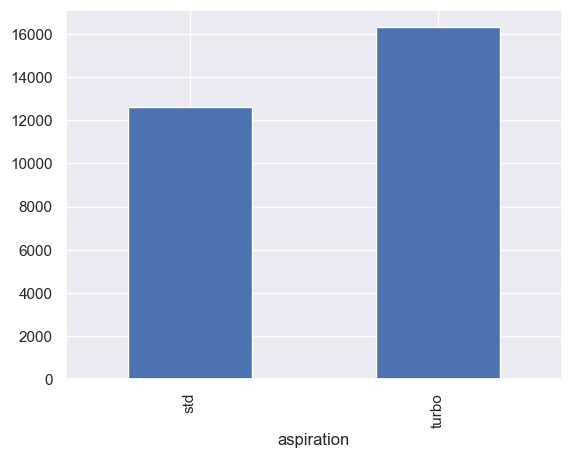

In [21]:
AP.plot(kind="bar")

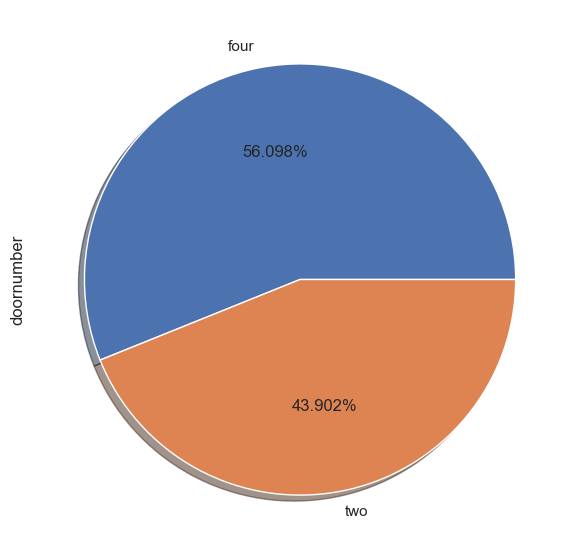

In [22]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ffffff")
df["doornumber"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [23]:
DP = df.groupby("doornumber")["price"].mean()
DP

doornumber
four    13501.152174
two     12989.924078
Name: price, dtype: float64

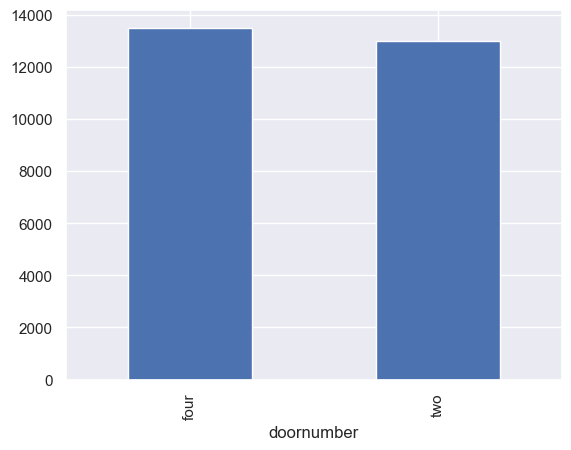

In [24]:
DP.plot(kind = "bar")
plt.show()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


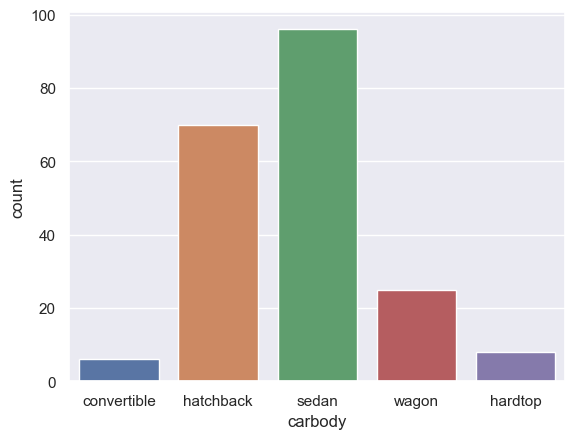

In [25]:
sns.countplot(df["carbody"]);

In [26]:
CBP = df.groupby("carbody")["price"].mean()
CBP

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

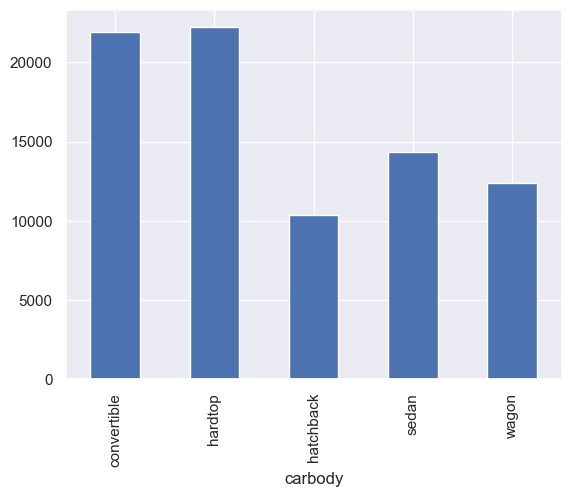

In [27]:
CBP.plot(kind = "bar")
plt.show()

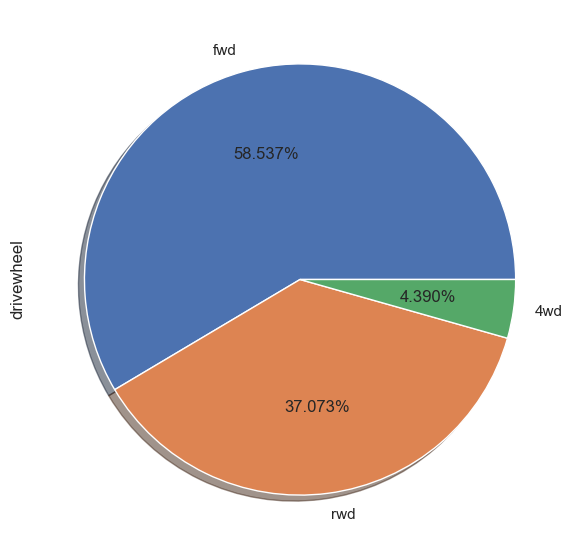

In [28]:
plt.figure(figsize = [7, 7], clear = True, facecolor = "#ffffff")
df["drivewheel"].value_counts().plot.pie( autopct='%1.3f%%', shadow = True);

In [29]:
DWP = df.groupby("drivewheel")["price"].mean()
DWP

drivewheel
4wd    11087.463000
fwd     9239.308333
rwd    19910.809211
Name: price, dtype: float64

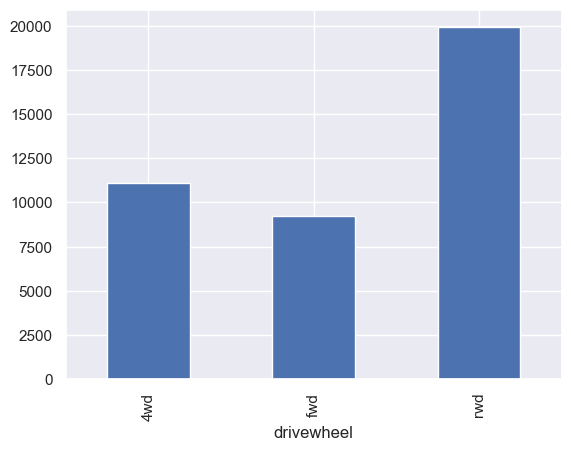

In [30]:
DWP.plot(kind = "bar")
plt.show()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


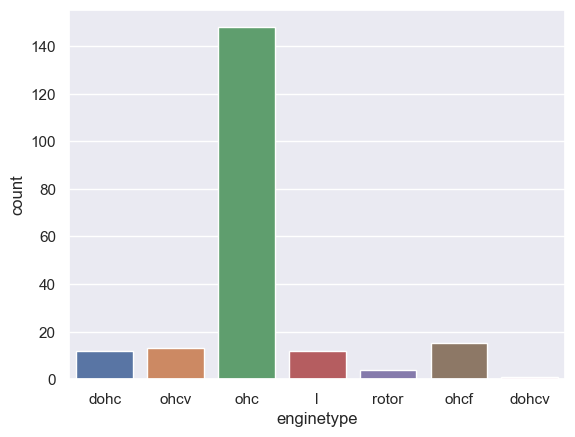

In [31]:
sns.countplot(df["enginetype"]);

In [32]:
ETP = df.groupby("enginetype")["price"].mean()
ETP

enginetype
dohc     18116.416667
dohcv    31400.500000
l        14627.583333
ohc      11574.048426
ohcf     13738.600000
ohcv     25098.384615
rotor    13020.000000
Name: price, dtype: float64

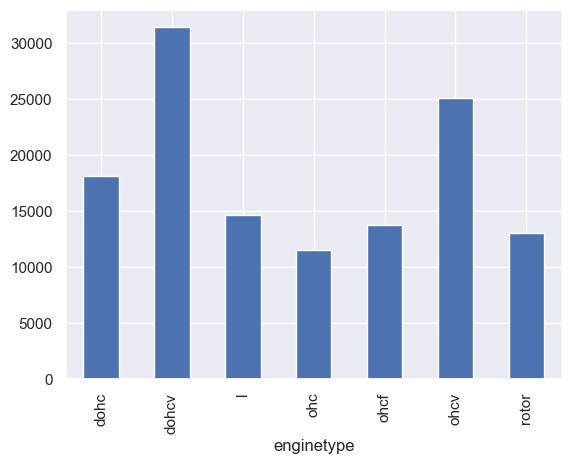

In [33]:
ETP.plot(kind = "bar")
plt.show()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


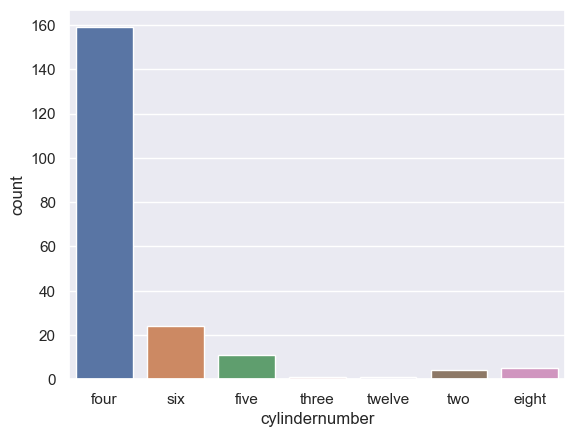

In [34]:
sns.countplot(df["cylindernumber"]);

In [35]:
CNP = df.groupby("cylindernumber")["price"].mean()
CNP

cylindernumber
eight     37400.100000
five      21630.469727
four      10285.754717
six       23671.833333
three      5151.000000
twelve    36000.000000
two       13020.000000
Name: price, dtype: float64

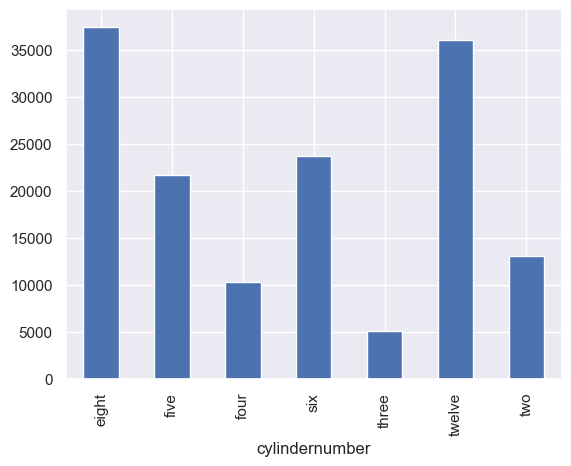

In [36]:
CNP.plot(kind = "bar")
plt.show()

C:\Users\singh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


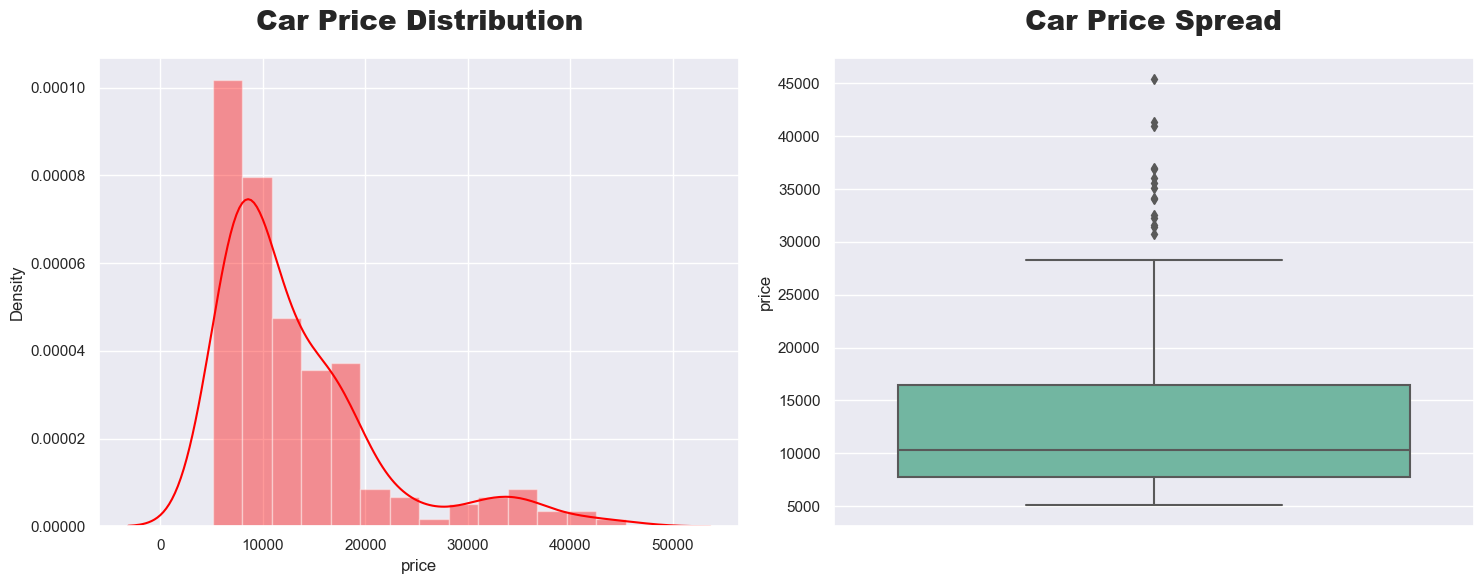

In [37]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.distplot(df["price"],color="red",kde=True)
plt.title("Car Price Distribution",fontweight="black",pad=20,fontsize=20)

plt.subplot(1,2,2)
sns.boxplot(y=df["price"],palette="Set2")
plt.title("Car Price Spread",fontweight="black",pad=20,fontsize=20)
plt.tight_layout()
plt.show()

### Data processing, preparation, transformation

In [38]:
dfo = df.select_dtypes(include="object")
dfo

,fueltype,CompanyName,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
car_ID,,,,,,,,,,
1,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
2,gas,alfa-romero,std,two,convertible,rwd,front,dohc,four,mpfi
3,gas,alfa-romero,std,two,hatchback,rwd,front,ohcv,six,mpfi
4,gas,audi,std,four,sedan,fwd,front,ohc,four,mpfi
5,gas,audi,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
201,gas,volvo,std,four,sedan,rwd,front,ohc,four,mpfi
202,gas,volvo,turbo,four,sedan,rwd,front,ohc,four,mpfi
203,gas,volvo,std,four,sedan,rwd,front,ohcv,six,mpfi


In [39]:
dfn = df.select_dtypes(include=["int","float"])
dfn

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0


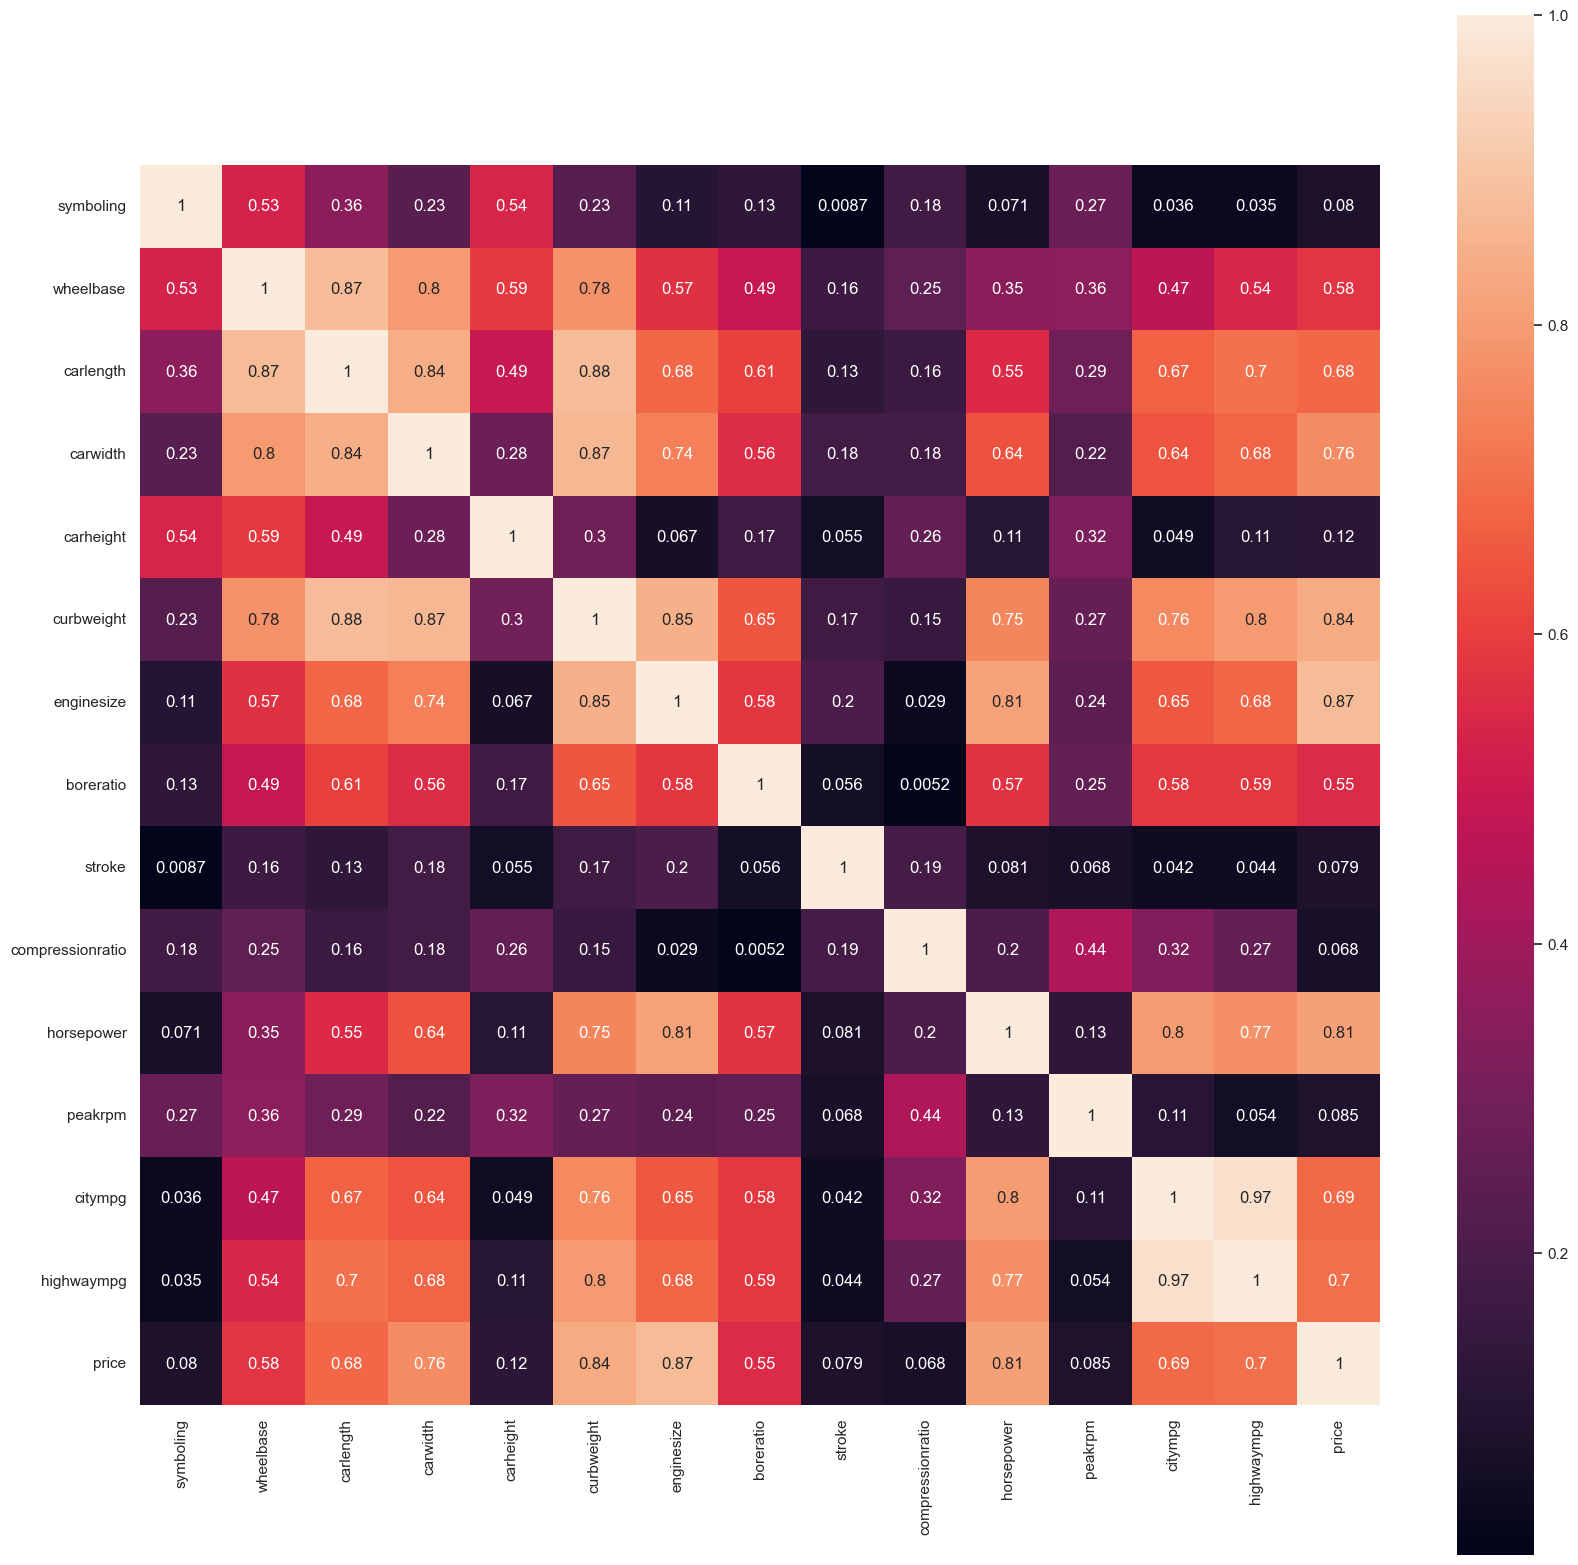

In [40]:
plt.figure(figsize=(20, 20))
ax = sns.heatmap(df.corr(method='pearson').abs(), annot=True, square=True)
plt.show()

In [41]:
df['average_mpg'] = (0.5*df['citympg'] + 0.5*df['highwaympg'])

In [42]:
df = df.drop(['citympg', 'highwaympg'], axis=1)

In [43]:
df = df.drop(['CompanyName', 'symboling','carheight','stroke','compressionratio','peakrpm'],axis=1)

C:\Users\singh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


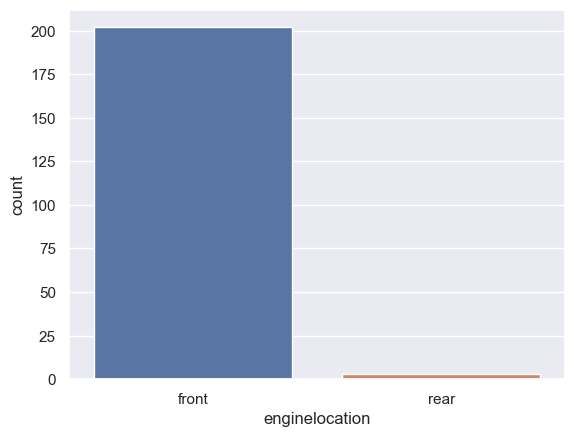

In [44]:
sns.countplot(df["enginelocation"]);

In [45]:
df.groupby("enginelocation").count()

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,average_mpg
enginelocation,,,,,,,,,,,,,,,,,
front,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202
rear,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3


In [46]:
df.drop(['enginelocation'],axis=1,inplace=True)

In [47]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,price,average_mpg
car_ID,,,,,,,,,,,,,,,,,
1,gas,std,two,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,13495.0,24.0
2,gas,std,two,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,mpfi,3.47,111,16500.0,24.0
3,gas,std,two,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,mpfi,2.68,154,16500.0,22.5
4,gas,std,four,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,mpfi,3.19,102,13950.0,27.0
5,gas,std,four,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,mpfi,3.19,115,17450.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,gas,std,four,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,mpfi,3.78,114,16845.0,25.5
202,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,mpfi,3.78,160,19045.0,22.0
203,gas,std,four,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,mpfi,3.58,134,21485.0,20.5


In [48]:
df = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=df)

In [49]:
scaler = StandardScaler()

In [50]:
num_cols = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower',
            'average_mpg']

df[num_cols] = scaler.fit_transform(df[num_cols])
df

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,average_mpg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,13495.0,-0.599325,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519071,0.174483,16500.0,-0.599325,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404880,1.264536,16500.0,-0.824897,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517266,-0.053668,13950.0,-0.148181,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517266,0.275883,17450.0,-1.200850,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1.721873,1.198549,1.398245,0.763241,0.339248,1.666445,0.250533,16845.0,-0.373753,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
202,1.721873,1.198549,1.351515,0.949992,0.339248,1.666445,1.416637,19045.0,-0.900088,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
203,1.721873,1.198549,1.398245,0.878757,1.109571,0.926204,0.757535,21485.0,-1.125660,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


### Splitting Data

In [51]:
x = df.drop(columns=["price"])
y = df["price"]

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Importing and building models

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score

In [54]:
r2_score_train = []
r2_score_test = []
mae_score_train = []
mae_score_test = []
mse_score_train = []
mse_score_test = []

def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    
    # calculate R2 score
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    r2_score_train.append(round(a,5))
    r2_score_test.append(round(b,5))
    
    # calculate mean absolute error
    mae_train = mean_absolute_error(y_train, x_train_pred)
    mae_test = mean_absolute_error(y_test, x_test_pred)
    mae_score_train.append(round(mae_train,5))
    mae_score_test.append(round(mae_test,5))
    
    # calculate mean squared error
    mse_train = mean_squared_error(y_train, x_train_pred)
    mse_test = mean_squared_error(y_test, x_test_pred)
    mse_score_train.append(round(mse_train,5))
    mse_score_test.append(round(mse_test,5))
    
    
    print(f"r2_Score of {model} model on Training Data is:", round(a,5))
    print(f"r2_Score of {model} model on Testing Data is:",round(b,5))
    print(f"MAE of {model} model on Training Data is:", round(mae_train,5))
    print(f"MAE of {model} model on Testing Data is:", round(mae_test,5))
    print(f"MSE of {model} model on Training Data is:", round(mse_train,5))
    print(f"MSE of {model} model on Testing Data is:", round(mse_test,5))

In [55]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 92.33928
r2_Score of LinearRegression() model on Testing Data is: 88.73825
MAE of LinearRegression() model on Training Data is: 1559.87651
MAE of LinearRegression() model on Testing Data is: 2213.64369
MSE of LinearRegression() model on Training Data is: 4568689.80964
MSE of LinearRegression() model on Testing Data is: 8890481.74776


In [56]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537
r2_Score of DecisionTreeRegressor() model on Testing Data is: 92.53903
MAE of DecisionTreeRegressor() model on Training Data is: 64.66463
MAE of DecisionTreeRegressor() model on Testing Data is: 1710.94715
MSE of DecisionTreeRegressor() model on Training Data is: 80289.71037
MSE of DecisionTreeRegressor() model on Testing Data is: 5889993.33253


In [57]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.57002
r2_Score of RandomForestRegressor() model on Testing Data is: 95.79836
MAE of RandomForestRegressor() model on Training Data is: 602.00129
MAE of RandomForestRegressor() model on Testing Data is: 1306.42297
MSE of RandomForestRegressor() model on Training Data is: 852806.22749
MSE of RandomForestRegressor() model on Testing Data is: 3316941.17352


### Results

In [58]:
data = {
    'r2_score_train': r2_score_train,
    'r2_score_test': r2_score_test,
    'mae_score_train': mae_score_train,
    'mae_score_test': mae_score_test,
    'mse_score_train': mse_score_train,
    'mse_score_test': mse_score_test,
}

# Create a dataframe from the dictionary
results = pd.DataFrame(data)

In [59]:
results['models'] = ['Linear Regression', 'Decion Tree Regressor', 'Random Forest']

In [60]:
results.set_index('models')

,r2_score_train,r2_score_test,mae_score_train,mae_score_test,mse_score_train,mse_score_test
models,,,,,,
Linear Regression,92.33928,88.73825,1559.87651,2213.64369,4.568690e+06,8.890482e+06
Decion Tree Regressor,99.86537,92.53903,64.66463,1710.94715,8.028971e+04,5.889993e+06
Random Forest,98.57002,95.79836,602.00129,1306.42297,8.528062e+05,3.316941e+06
